In [ ]:
# Бинарная классификация (На основе текстов отзывов. Классифицируем отзыв - отрицательный/положительный)

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras import models, layers, losses, metrics, optimizers

In [9]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # num_words - получаем это колич слов (наиболее встречаемых)
# .._data - списки отзывов (отзыв = список индексов слов)
# .._labels - список нулей/единиц (отрицательные/положительные отзывы) 

In [10]:
# Пример расшифровки
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)  # векторизованные обучающие данные
x_test = vectorize_sequences(test_data) # ветризованные тестовые данные

In [21]:
# веторизуем метки
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [28]:
# модель
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [30]:
# Валидацияонный набор (проверка точности во время обучения)
x_validation = x_train[:10000]
partial_x_train = x_train[10000:]

y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5027 - binary_accuracy: 0.7831 - val_loss: 0.3815 - val_binary_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2946 - binary_accuracy: 0.9055 - val_loss: 0.3117 - val_binary_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2173 - binary_accuracy: 0.9277 - val_loss: 0.2766 - val_binary_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1701 - binary_accuracy: 0.9455 - val_loss: 0.2764 - val_binary_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1446 - binary_accuracy: 0.9529 - val_loss: 0.2849 - val_binary_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1153 - binary_accuracy: 0.9640 - val_loss: 0.3376 - val_binary_accuracy: 0.8692
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

In [34]:
print(history.history.keys())
# loss - потери на тренировочном наборе для каждой эпохи
# val_loss - для валидационной выборки

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


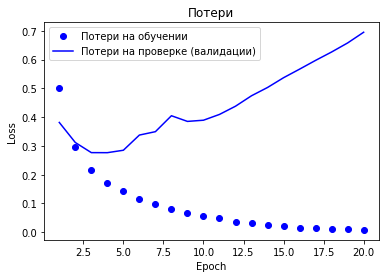

In [49]:
# График потерь
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)

plt.plot(epoch, loss_values, 'bo', label='Потери на обучении')
plt.plot(epoch, val_loss_values, 'b', label='Потери на проверке (валидации)')
plt.title('Потери')
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.show()

# На обучении LOSS уменьшается - отлично
# На валидации LOSS увеличивается после 4 эпохи (переобучение)

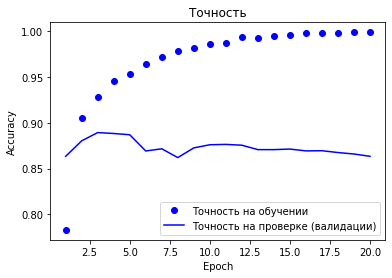

In [51]:
# График точности
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epoch = range(1, len(loss_values) + 1)

plt.plot(epoch, acc_values, 'bo', label='Точность на обучении')
plt.plot(epoch, val_acc_values, 'b', label='Точность на проверке (валидации)')
plt.title('Точность')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# На обучении ACC увеличивается - отлично
# На валидации ACC evtymiftncz после 4 эпохи (переобучение)

In [53]:
# Обучим на 4 эпохах
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
history_4_epoch = model.fit(x=partial_x_train, y=partial_y_train, epochs=4, batch_size=512, validation_data=(x_validation, y_validation))

Epoch 1/4
30/30 [==============================] - 1s 24ms/step - loss: 0.5400 - binary_accuracy: 0.7567 - val_loss: 0.4059 - val_binary_accuracy: 0.8698
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.3247 - binary_accuracy: 0.9005 - val_loss: 0.3183 - val_binary_accuracy: 0.8830
Epoch 3/4
30/30 [==============================] - 1s 18ms/step - loss: 0.2366 - binary_accuracy: 0.9259 - val_loss: 0.2851 - val_binary_accuracy: 0.8922
Epoch 4/4
30/30 [==============================] - 1s 18ms/step - loss: 0.1826 - binary_accuracy: 0.9429 - val_loss: 0.2766 - val_binary_accuracy: 0.8911


In [55]:
results = model.evaluate(x_test, y_test)
results
# Точность 88%, Потери 29%

782/782 [==============================] - 1s 1ms/step - loss: 0.2960 - binary_accuracy: 0.8831


[0.29598313570022583, 0.8831200003623962]

In [56]:
# Предскажем для других значений
model.predict(x=x_test)

array([[0.2500181 ],
       [0.988973  ],
       [0.76346457],
       ...,
       [0.1288856 ],
       [0.15344673],
       [0.5362619 ]], dtype=float32)